In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [16]:
result_df = pd.read_csv('data/results.csv')
status_df = pd.read_csv('data/status.csv')
drivers_df = pd.read_csv('data/drivers.csv')
races_df = pd.read_csv('data/races.csv')
constructor_df = pd.read_csv('data/constructors.csv')
driver_standings_df = pd.read_csv('data/driver_standings.csv')
pit_stops_df = pd.read_csv('data/pit_stops.csv')
pd.get_option("display.max_columns",None)

In [59]:
result_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


In [60]:
drivers_df

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
854,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [61]:
races_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [62]:
constructor_df

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [7]:
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [8]:
pit_stops_df.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [17]:
# showing this df has non-unique raceId/driverId pairs with multiple stops, each given their own row. 
pit_stops_df.loc[(pit_stops_df['raceId'] == 841) & (pit_stops_df['driverId'] == 153)]

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
18,841,153,2,17,17:31:06,24.463,24463
34,841,153,3,35,17:59:45,26.348,26348


In [18]:
# this cell gets the average and max for raceId/driverId pairs
pit_stops_averaged_df = pit_stops_df.groupby(["raceId", "driverId"])["milliseconds"].agg(["mean", "max", "min"]).reset_index()

pit_stops_averaged_df.head()

,raceId,driverId,mean,max,min
0,841,1,23213.0,23227,23199
1,841,2,24046.0,25098,22994
2,841,3,23716.0,23716,23716
3,841,4,24055.0,24733,23251
4,841,5,24865.0,24865,24865


In [19]:
# add total number of stops
df1 = pit_stops_df.groupby(["raceId", "driverId"])["stop"].max().reset_index()

pit_stops_averaged_df = pd.merge(pit_stops_averaged_df, df1, on=["raceId", "driverId"])

# rename the columns
pit_stops_averaged_df.rename(columns={'mean':'avg_pitstop','max':'longest_pitstop','min':'shortest_pitstop','stop':'pitstops'}, inplace=True)
pit_stops_averaged_df.head()

,raceId,driverId,avg_pitstop,longest_pitstop,shortest_pitstop,pitstops
0,841,1,23213.0,23227,23199,2
1,841,2,24046.0,25098,22994,2
2,841,3,23716.0,23716,23716,1
3,841,4,24055.0,24733,23251,3
4,841,5,24865.0,24865,24865,1


In [20]:
# this cell takes the data from the pit stop csv and consolidates each raceId/driverId pair into its own row.
s = pit_stops_df.groupby(['raceId','driverId']).cumcount()

df1 = pit_stops_df.set_index(['raceId', 'driverId', s]).unstack().sort_index(level=1, axis=1)
df1.columns = [f'{x}{y}' for x, y in df1.columns]
pit_stops_consilidated_df = df1.reset_index()

In [10]:
# Probably shouldn't use this method. It has a lot of NaN values for those results where an nth pit stop wasn't even made.
pit_stops_consilidated_df.head()

,raceId,driverId,duration0,lap0,milliseconds0,stop0,time0,duration1,lap1,milliseconds1,stop1,time1,duration2,lap2,milliseconds2,stop2,time2,duration3,lap3,milliseconds3,stop3,time3,duration4,lap4,milliseconds4,stop4,time4,duration5,lap5,milliseconds5,stop5,time5
0,841,1,23.227,16.0,23227.0,1.0,17:28:24,23.199,36.0,23199.0,2.0,17:59:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,841,2,22.994,15.0,22994.0,1.0,17:27:41,25.098,30.0,25098.0,2.0,17:51:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,841,3,23.716,16.0,23716.0,1.0,17:29:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,841,4,23.251,12.0,23251.0,1.0,17:22:34,24.733,27.0,24733.0,2.0,17:46:04,24.181,42.0,24181.0,3.0,18:09:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,841,5,24.865,17.0,24865.0,1.0,17:31:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
races_df_con = races_df.raceId.astype(int)

con1 = pd.merge(result_df, races_df_con, on ='raceId')
con2 = pd.merge(con1, drivers_df, on = 'driverId')
con3 = pd.merge(con2, constructor_df, on ='constructorId')
con4 = pd.merge(con3, pit_stops_averaged_df, on=['raceId','driverId'])
con4.head()


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,constructorRef,name,nationality_y,url_y,avg_pitstop,longest_pitstop,shortest_pitstop,pitstops
0,20780,841,1,1,3,2,2,2,2,18.0,58,+22.297,5392556,41,8,1:30.314,211.382,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,23213.000000,23227,23199,2
1,20808,842,1,1,3,2,8,8,8,4.0,56,+1:09.957,5929789,54,5,1:41.512,196.575,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,23252.750000,25382,22466,4
2,20825,843,1,1,3,3,1,1,1,25.0,56,1:36:58.226,5818226,48,2,1:40.415,195.424,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,20659.333333,20878,20533,3
3,20852,844,1,1,3,4,4,4,4,12.0,58,+40.232,5457790,48,4,1:30.108,213.264,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,24909.250000,35688,20833,4
4,20874,845,1,1,3,3,2,2,2,18.0,66,+0.630,5943931,52,1,1:26.727,193.227,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,20364.250000,20988,19761,4


In [22]:
df = pd.merge(con4, status_df, on ='statusId')
pd.get_option("display.max_columns",None)
df.head()

# df is the full dataframe to freely drop from:

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,constructorRef,name,nationality_y,url_y,avg_pitstop,longest_pitstop,shortest_pitstop,pitstops,status
0,20780,841,1,1,3,2,2,2,2,18.0,58,+22.297,5392556,41,8,1:30.314,211.382,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,23213.000000,23227,23199,2,Finished
1,20808,842,1,1,3,2,8,8,8,4.0,56,+1:09.957,5929789,54,5,1:41.512,196.575,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,23252.750000,25382,22466,4,Finished
2,20825,843,1,1,3,3,1,1,1,25.0,56,1:36:58.226,5818226,48,2,1:40.415,195.424,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,20659.333333,20878,20533,3,Finished
3,20852,844,1,1,3,4,4,4,4,12.0,58,+40.232,5457790,48,4,1:30.108,213.264,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,24909.250000,35688,20833,4,Finished
4,20874,845,1,1,3,3,2,2,2,18.0,66,+0.630,5943931,52,1,1:26.727,193.227,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,20364.250000,20988,19761,4,Finished


In [65]:
race_features_df = races_df[['raceId','year','name']]
race_features_df

,raceId,year,name
0,1,2009,Australian Grand Prix
1,2,2009,Malaysian Grand Prix
2,3,2009,Chinese Grand Prix
3,4,2009,Bahrain Grand Prix
4,5,2009,Spanish Grand Prix
...,...,...,...
1097,1116,2023,United States Grand Prix
1098,1117,2023,Mexico City Grand Prix
1099,1118,2023,São Paulo Grand Prix
1100,1119,2023,Las Vegas Grand Prix


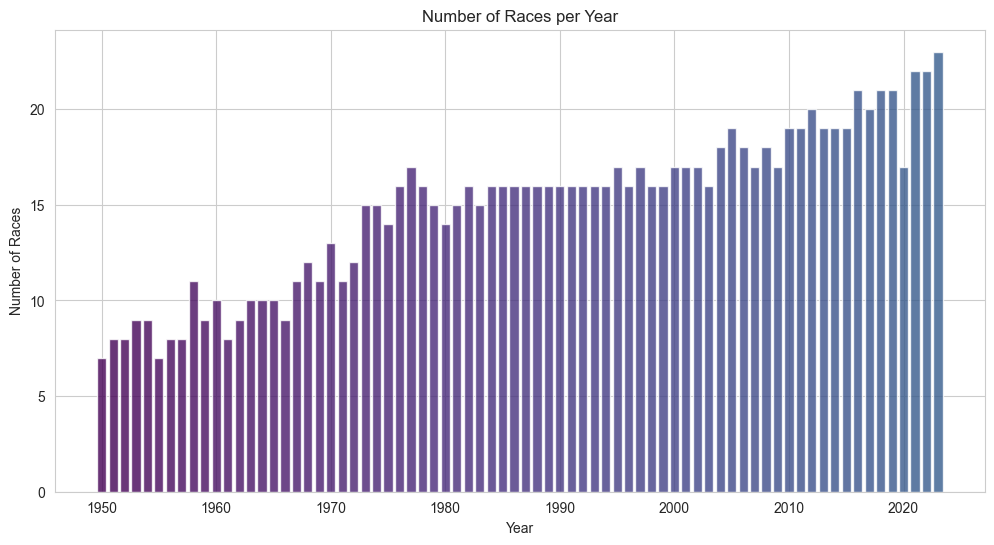

In [68]:
races_per_year = race_features_df.groupby('year')['raceId'].nunique()
colors = plt.cm.viridis(range(len(races_per_year)))
plt.figure(figsize=(12, 6))
plt.bar(races_per_year.index, races_per_year.values, color=colors, alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.title('Number of Races per Year')
plt.show()

In [78]:
race_results_df = pd.merge(result_df, race_features_df, on ='raceId')
convert = ['position','milliseconds','fastestLap','rank','fastestLapSpeed']
for item in convert:
    race_results_df[item] = pd.to_numeric(race_results_df[item],
                                          errors="coerce")
race_results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,name
0,1,18,1,1,22,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1,2008,Australian Grand Prix
1,2,18,2,2,3,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1,2008,Australian Grand Prix
2,3,18,3,3,7,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1,2008,Australian Grand Prix
3,4,18,4,4,5,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1,2008,Australian Grand Prix
4,5,18,5,1,23,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1,2008,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16.0,16,16,0.0,57,\N,NaN,39.0,12.0,1:29.833,211.632,11,2022,Abu Dhabi Grand Prix
25836,25842,1096,825,210,20,16,17.0,17,17,0.0,57,\N,NaN,40.0,20.0,1:31.158,208.556,11,2022,Abu Dhabi Grand Prix
25837,25843,1096,1,131,44,5,18.0,18,18,0.0,55,\N,NaN,42.0,11.0,1:29.788,211.738,9,2022,Abu Dhabi Grand Prix
25838,25844,1096,849,3,6,20,19.0,19,19,0.0,55,\N,NaN,45.0,14.0,1:30.309,210.517,130,2022,Abu Dhabi Grand Prix


<Figure size 1200x600 with 0 Axes>

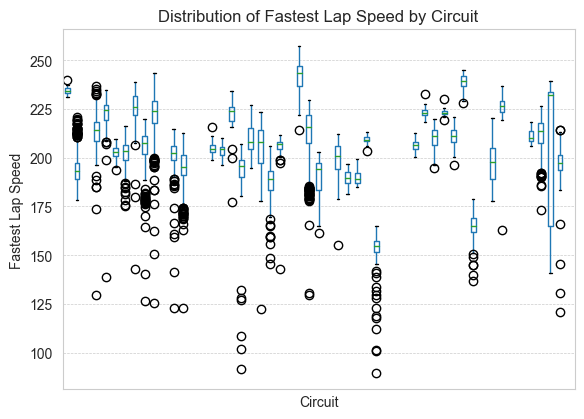

In [139]:
# Grouping and getting the max value
grouped = race_results_df[['year', 'name', 'fastestLapSpeed']].groupby(['year', 'name']).max().dropna()

plt.figure(figsize=(12, 6))
# Using pandas boxplot
race_results_df.boxplot(column='fastestLapSpeed', by='name')
plt.title('Distribution of Fastest Lap Speed by Circuit')
plt.suptitle('')  # This removes the default title set by pandas
plt.ylabel('Fastest Lap Speed')
plt.xlabel('Circuit')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')  # Adding a y-axis grid for better readability
plt.gca().set_xticks([])
plt.show()

In [109]:
races = race_results_df_2022[['name','fastestLapSpeed']].groupby('name')
print(races.groups.keys())
print(races.groups.values())

dict_keys(['Abu Dhabi Grand Prix', 'Australian Grand Prix', 'Austrian Grand Prix', 'Azerbaijan Grand Prix', 'Bahrain Grand Prix', 'Belgian Grand Prix', 'Brazilian Grand Prix', 'British Grand Prix', 'Canadian Grand Prix', 'Dutch Grand Prix', 'Emilia Romagna Grand Prix', 'French Grand Prix', 'Hungarian Grand Prix', 'Italian Grand Prix', 'Japanese Grand Prix', 'Mexico City Grand Prix', 'Miami Grand Prix', 'Monaco Grand Prix', 'Saudi Arabian Grand Prix', 'Singapore Grand Prix', 'Spanish Grand Prix', 'United States Grand Prix'])
dict_values([Index([25820, 25821, 25822, 25823, 25824, 25825, 25826, 25827, 25828, 25829,
       25830, 25831, 25832, 25833, 25834, 25835, 25836, 25837, 25838, 25839],
      dtype='int64'), Index([25440, 25441, 25442, 25443, 25444, 25445, 25446, 25447, 25448, 25449,
       25450, 25451, 25452, 25453, 25454, 25455, 25456, 25457, 25458, 25459],
      dtype='int64'), Index([25600, 25601, 25602, 25603, 25604, 25605, 25606, 25607, 25608, 25609,
       25610, 25611, 25612

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (22,) and arg 1 with shape (22, 20).

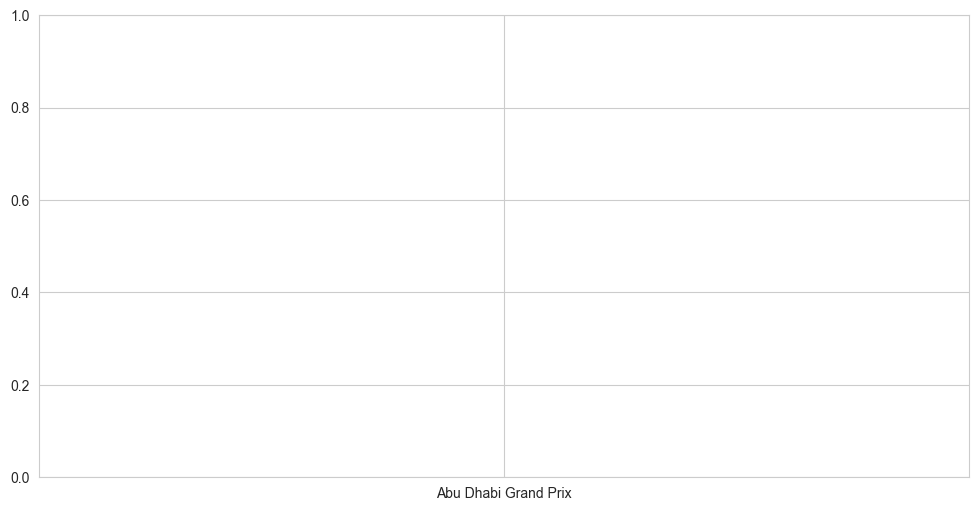

In [108]:
plt.figure(figsize=(12, 6))
plt.bar(races.groups.keys(),races.groups.values())
plt.xlabel('Circuit')
plt.ylabel('Speed')
plt.title('Number of Races per Year')
plt.show()

In [16]:
def time_str_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split(":"))
    return minutes * 60 + seconds

In [17]:
# this is something I think would be more useful

df_truncated = df.drop(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'positionText', 'time', 'rank', 'statusId', 'driverRef', 'number_y', 'code', 'nationality_x', 'url_x', 'constructorRef', 'url_y'], axis=1)
df_truncated['driver_name'] = df_truncated['forename']+' '+df['surname']
df_truncated = df_truncated.drop(['forename','surname'], axis=1)
df_truncated = df_truncated[df_truncated['status'] == "Finished"]
df_truncated = df_truncated.drop('status', axis=1)

df_truncated['dob'] = pd.to_datetime(df_truncated['dob'])
from datetime import datetime
dates = datetime.today()-df_truncated['dob']
age = dates.dt.days/365
df_truncated['age'] = round(age)
df_truncated = df_truncated.drop('dob', axis=1)

df_truncated = df_truncated.drop([1956])
df_truncated['fastestLapTime'] = df_truncated['fastestLapTime'].map(lambda x: time_str_to_seconds(x))

df_truncated.tail()

,grid,position,positionOrder,points,laps,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,name,nationality_y,avg_pitstop,longest_pitstop,shortest_pitstop,pitstops,driver_name,age
2477,19,10,10,1.0,56,6202606,49,101.243,196.031,AlphaTauri,Italian,2.346450e+04,23688,23241,2,Yuki Tsunoda,23.0
2478,11,11,11,0.0,58,5355285,40,89.489,212.446,AlphaTauri,Italian,2.192650e+04,22262,21591,2,Yuki Tsunoda,23.0
2479,17,12,12,0.0,56,6727980,50,108.173,183.472,Manor Marussia,British,3.002667e+04,37748,25812,3,Alexander Rossi,32.0
2480,19,15,15,0.0,71,10921833,69,87.919,176.439,Manor Marussia,British,1.172984e+06,2008464,25509,3,Pascal Wehrlein,29.0
2481,22,12,12,0.0,71,10907144,47,87.796,176.686,Manor Marussia,British,1.747072e+06,2009052,1485092,2,Esteban Ocon,27.0


In [ ]:
df.groupby("Race")